In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv(r"D:\AI & data\data sets\bs140513_032310.csv")
df.head()


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
df['day_of_week'] = df['step'] % 7

# هل يوم ويك إند؟
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)


In [4]:
# حساب أعلى قيمة في amount
max_amount = df['amount'].max()

if max_amount <= 10000:
    max_amount = 10001  
# إنشاء الـ bins
bins = [0, 100, 1000, 10000, max_amount]
labels = ['low', 'medium', 'high', 'very_high']

# التقسيم باستخدام pd.cut
df['amount_bin'] = pd.cut(df['amount'], bins=bins, labels=labels, include_lowest=True)




In [5]:
print(df['amount_bin'].unique().tolist())


['low', 'medium', 'high']


In [6]:
df['amount_bin'] = df['amount_bin'].astype(str).str.replace("'", "").str.strip()

#. تحويل القيم إلى أرقام 
df['amount_bin'] = df['amount_bin'].map({
    'low': 0,
    'medium': 1,
    'high': 2
})

In [7]:
print(df['gender'].unique().tolist())


["'M'", "'F'", "'E'", "'U'"]


In [8]:
df['gender'] = df['gender'].astype(str).str.replace("'", "").str.strip()

# . تحويل القيم إلى أرقام مع اعتبار 'E' و 'U' كـ NaN
df['gender'] = df['gender'].map({
    'M': 0,
    'F': 1,
    'E': pd.NA,
    'U': pd.NA
})

In [9]:
df['customer_txn_count'] = df.groupby('customer').cumcount() + 1


In [10]:
df.to_csv("banksim_extended.csv", index=False)



In [11]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,day_of_week,is_weekend,amount_bin,customer_txn_count
0,0,'C1093826151','4',0,'28007','M348934600','28007','es_transportation',4.55,0,0,0,0,1
1,0,'C352968107','2',0,'28007','M348934600','28007','es_transportation',39.68,0,0,0,0,1
2,0,'C2054744914','4',1,'28007','M1823072687','28007','es_transportation',26.89,0,0,0,0,1
3,0,'C1760612790','3',0,'28007','M348934600','28007','es_transportation',17.25,0,0,0,0,1
4,0,'C757503768','5',0,'28007','M348934600','28007','es_transportation',35.72,0,0,0,0,1


In [12]:
# ترتيب الأعمدة حسب طلبك
ordered_columns = [
    'step',
    'day_of_week',
    'is_weekend',
    'customer',
    'age',
    'gender',
    'zipcodeOri',
    'merchant',
    'zipMerchant',
    'category',
    'amount',
    'customer_txn_count',
    'amount_bin',
    'fraud'
]

df = df[ordered_columns]

df.head()


,step,day_of_week,is_weekend,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,customer_txn_count,amount_bin,fraud
0,0,0,0,'C1093826151','4',0,'28007','M348934600','28007','es_transportation',4.55,1,0,0
1,0,0,0,'C352968107','2',0,'28007','M348934600','28007','es_transportation',39.68,1,0,0
2,0,0,0,'C2054744914','4',1,'28007','M1823072687','28007','es_transportation',26.89,1,0,0
3,0,0,0,'C1760612790','3',0,'28007','M348934600','28007','es_transportation',17.25,1,0,0
4,0,0,0,'C757503768','5',0,'28007','M348934600','28007','es_transportation',35.72,1,0,0


In [13]:
print(df['age'].unique().tolist())


["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"]


In [14]:
df['age'] = df['age'].astype(str).str.replace("'", "").str.strip()

df['age'] = pd.to_numeric(df['age'], errors='coerce')

age_map = {
    1: 20,
    2: 30,
    3: 40,
    4: 50,
    5: 60
}

df['age'] = df['age'].map(age_map)




In [15]:
df.head()

,step,day_of_week,is_weekend,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,customer_txn_count,amount_bin,fraud
0,0,0,0,'C1093826151',50.0,0,'28007','M348934600','28007','es_transportation',4.55,1,0,0
1,0,0,0,'C352968107',30.0,0,'28007','M348934600','28007','es_transportation',39.68,1,0,0
2,0,0,0,'C2054744914',50.0,1,'28007','M1823072687','28007','es_transportation',26.89,1,0,0
3,0,0,0,'C1760612790',40.0,0,'28007','M348934600','28007','es_transportation',17.25,1,0,0
4,0,0,0,'C757503768',60.0,0,'28007','M348934600','28007','es_transportation',35.72,1,0,0


In [16]:
df.replace('-', pd.NA, inplace=True)
df.isna().sum()

step                      0
day_of_week               0
is_weekend                0
customer                  0
age                   30404
gender                 1693
zipcodeOri                0
merchant                  0
zipMerchant               0
category                  0
amount                    0
customer_txn_count        0
amount_bin                0
fraud                     0
dtype: int64

<Axes: >

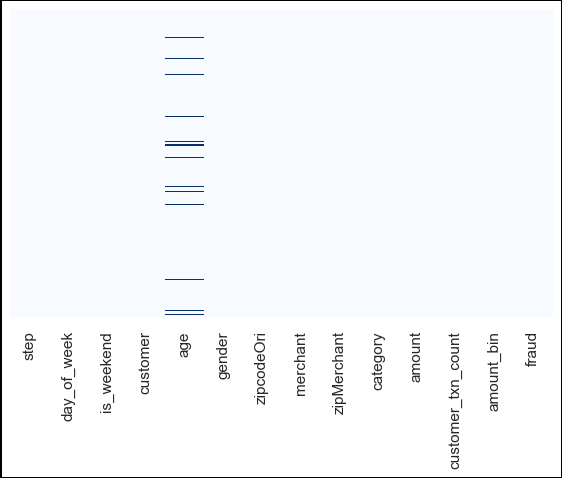

In [17]:
plt.figure(figsize=(7,4),edgecolor='black', linewidth=1)
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='Blues')

In [18]:
mean_gender = df['gender'].mean()
df['gender'] = df['gender'].fillna(mean_gender)

In [19]:
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

In [20]:
df.isna().sum()

step                  0
day_of_week           0
is_weekend            0
customer              0
age                   0
gender                0
zipcodeOri            0
merchant              0
zipMerchant           0
category              0
amount                0
customer_txn_count    0
amount_bin            0
fraud                 0
dtype: int64

In [21]:
df.duplicated(subset=None)

0         False
1         False
2         False
3         False
4         False
          ...  
594638    False
594639    False
594640    False
594641    False
594642    False
Length: 594643, dtype: bool

In [22]:
df['gender'] = df['gender'].astype('int64')
df['age'] = df['age'].astype('int64')

df.head()

,step,day_of_week,is_weekend,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,customer_txn_count,amount_bin,fraud
0,0,0,0,'C1093826151',50,0,'28007','M348934600','28007','es_transportation',4.55,1,0,0
1,0,0,0,'C352968107',30,0,'28007','M348934600','28007','es_transportation',39.68,1,0,0
2,0,0,0,'C2054744914',50,1,'28007','M1823072687','28007','es_transportation',26.89,1,0,0
3,0,0,0,'C1760612790',40,0,'28007','M348934600','28007','es_transportation',17.25,1,0,0
4,0,0,0,'C757503768',60,0,'28007','M348934600','28007','es_transportation',35.72,1,0,0


In [23]:
df.tail()

,step,day_of_week,is_weekend,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,customer_txn_count,amount_bin,fraud
594638,179,4,0,'C1753498738',40,1,'28007','M1823072687','28007','es_transportation',20.53,184,0,0
594639,179,4,0,'C650108285',50,1,'28007','M1823072687','28007','es_transportation',50.73,172,0,0
594640,179,4,0,'C123623130',30,1,'28007','M349281107','28007','es_fashion',22.44,168,0,0
594641,179,4,0,'C1499363341',60,0,'28007','M1823072687','28007','es_transportation',14.46,165,0,0
594642,179,4,0,'C616528518',50,1,'28007','M1823072687','28007','es_transportation',26.93,120,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   step                594643 non-null  int64  
 1   day_of_week         594643 non-null  int64  
 2   is_weekend          594643 non-null  int32  
 3   customer            594643 non-null  object 
 4   age                 594643 non-null  int64  
 5   gender              594643 non-null  int64  
 6   zipcodeOri          594643 non-null  object 
 7   merchant            594643 non-null  object 
 8   zipMerchant         594643 non-null  object 
 9   category            594643 non-null  object 
 10  amount              594643 non-null  float64
 11  customer_txn_count  594643 non-null  int64  
 12  amount_bin          594643 non-null  int64  
 13  fraud               594643 non-null  int64  
dtypes: float64(1), int32(1), int64(7), object(5)
memory usage: 61.2+ MB


In [25]:
numeric_df = df.select_dtypes(include=['number'])

numeric_df.corr()

,step,day_of_week,is_weekend,age,gender,amount,customer_txn_count,amount_bin,fraud
step,1.000000,0.010020,-0.004615,0.001676,0.000294,-0.007961,0.873345,-0.005874,-0.011898
day_of_week,0.010020,1.000000,0.786673,-0.000008,0.000494,0.000341,0.008726,-0.000881,-0.000341
is_weekend,-0.004615,0.786673,1.000000,0.000223,0.000230,0.001262,-0.004055,0.000578,-0.000194
age,0.001676,-0.000008,0.000223,1.000000,-0.016650,-0.002570,0.001627,-0.002213,-0.001228
gender,0.000294,0.000494,0.000230,-0.016650,1.000000,0.013018,-0.002662,0.016253,0.025575
amount,-0.007961,0.000341,0.001262,-0.002570,0.013018,1.000000,-0.041587,0.553488,0.489967
customer_txn_count,0.873345,0.008726,-0.004055,0.001627,-0.002662,-0.041587,1.000000,-0.054173,-0.071580
amount_bin,-0.005874,-0.000881,0.000578,-0.002213,0.016253,0.553488,-0.054173,1.000000,0.515899
fraud,-0.011898,-0.000341,-0.000194,-0.001228,0.025575,0.489967,-0.071580,0.515899,1.000000


In [26]:
df.shape

(594643, 14)

In [27]:
df.describe()

,step,day_of_week,is_weekend,age,gender,amount,customer_txn_count,amount_bin,fraud
count,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.00000,594643.000000
mean,94.986827,2.978363,0.278562,38.732957,0.545815,37.890135,79.134439,0.03564,0.012108
std,51.053632,1.992285,0.448292,11.387454,0.497897,111.402831,48.305544,0.19109,0.109369
min,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,52.000000,1.000000,0.000000,30.000000,0.000000,13.740000,37.000000,0.00000,0.000000
50%,97.000000,3.000000,0.000000,40.000000,1.000000,26.900000,76.000000,0.00000,0.000000
75%,139.000000,5.000000,1.000000,50.000000,1.000000,42.540000,119.000000,0.00000,0.000000
max,179.000000,6.000000,1.000000,60.000000,1.000000,8329.960000,265.000000,2.00000,1.000000


In [28]:
print(df['amount_bin'].unique().tolist())
print(df['zipcodeOri'].unique().tolist())
print(df['zipMerchant'].unique().tolist())
print(df['category'].unique().tolist())
print(df['fraud'].unique().tolist())





[0, 1, 2]
["'28007'"]
["'28007'"]
["'es_transportation'", "'es_health'", "'es_otherservices'", "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'", "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'", "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'", "'es_travel'", "'es_leisure'"]
[0, 1]


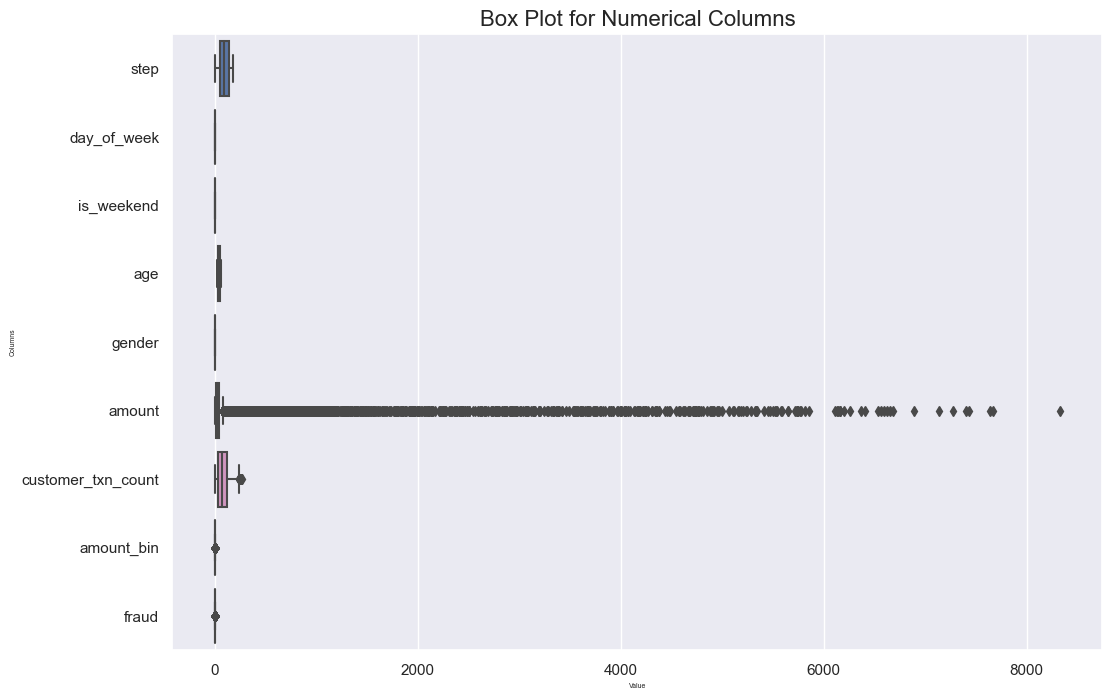

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient='h')

# إضافة العنوان والتسميات
plt.title('Box Plot for Numerical Columns', fontsize=16)
plt.xlabel('Value', fontsize=5)
plt.ylabel('Columns', fontsize=5)

# عرض الرسم
plt.show()

In [30]:
df['amount'] = np.log1p(df['amount'])  # log(amount + 1)


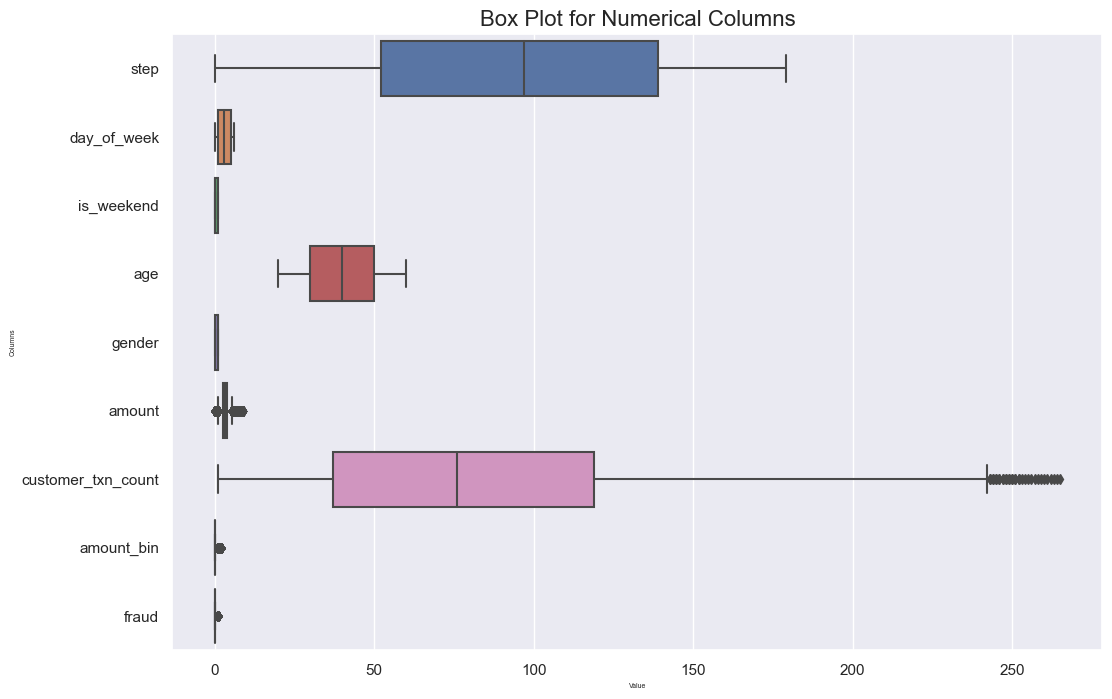

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient='h')

# إضافة العنوان والتسميات
plt.title('Box Plot for Numerical Columns', fontsize=16)
plt.xlabel('Value', fontsize=5)
plt.ylabel('Columns', fontsize=5)

# عرض الرسم
plt.show()

D:\app\XboxGames\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


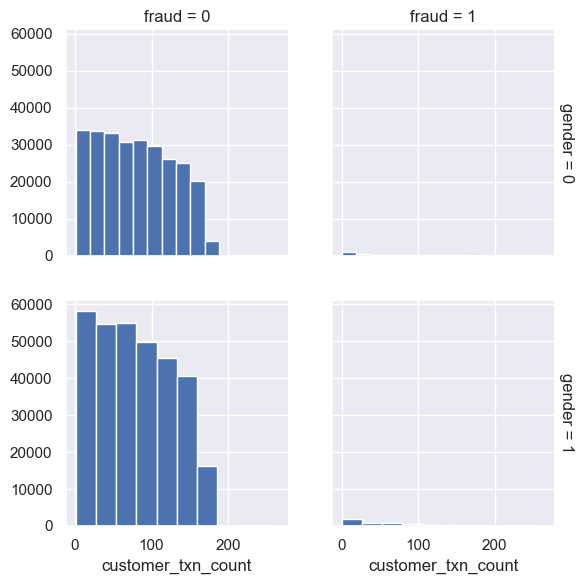

In [32]:
g = sns.FacetGrid(df, col='fraud', row='gender', margin_titles=True)
g = g.map(plt.hist, 'customer_txn_count')


plt.subplots_adjust(hspace=0.2, wspace=0.2)  

<Axes: ylabel='count'>

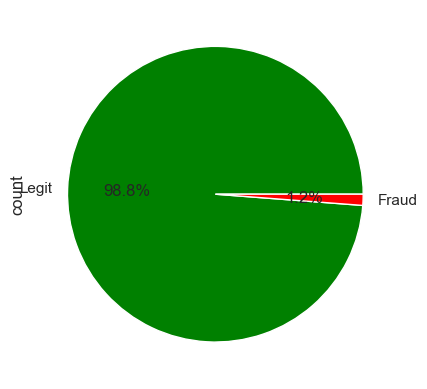

In [33]:
df['fraud'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Legit', 'Fraud'], colors=['green', 'red'])


<Axes: xlabel='fraud', ylabel='amount'>

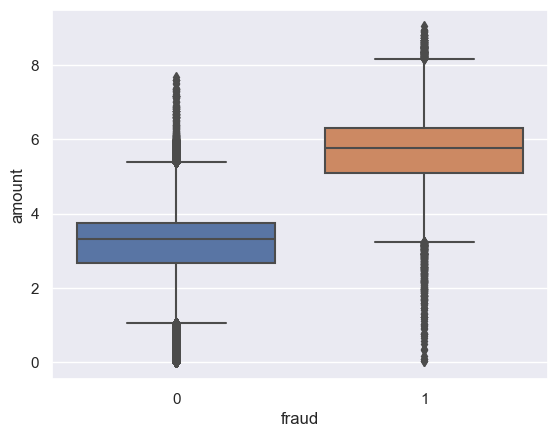

In [34]:
sns.boxplot(data=df, x='fraud', y='amount')


<Axes: xlabel='amount', ylabel='Density'>

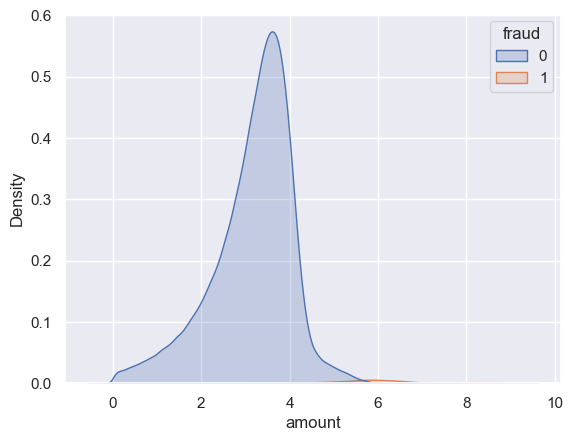

In [35]:
sns.kdeplot(data=df, x='amount', hue='fraud', fill=True)


<Axes: xlabel='category'>

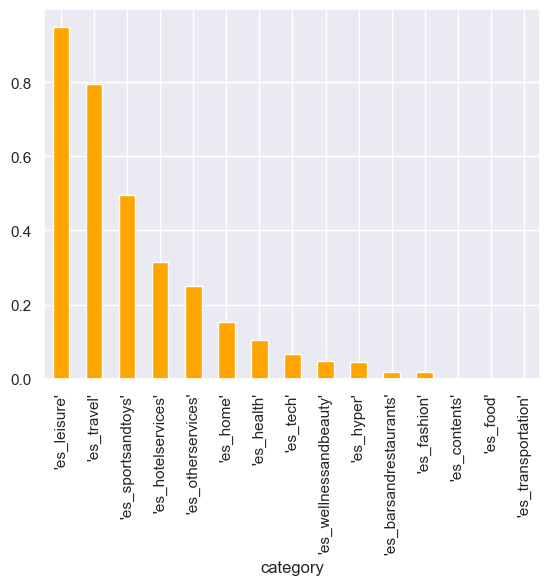

In [36]:
fraud_by_cat = df.groupby('category')['fraud'].mean().sort_values(ascending=False)
fraud_by_cat.plot(kind='bar', color='orange')


<Axes: xlabel='step'>

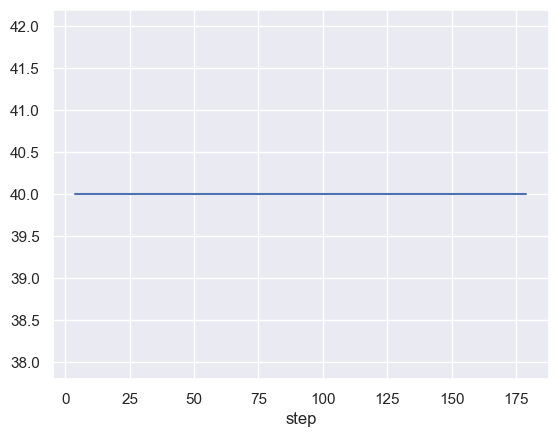

In [37]:
df.groupby('step')['fraud'].sum().rolling(5).mean().plot()


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
features = [
    'amount',
    'is_weekend',
    'gender',
    'age',
    'customer_txn_count',
    'category',
    'day_of_week'
]

df = df.dropna(subset=features + ['fraud'])

X = df[features]
y = df['fraud']
df['category'] = df['category'].astype(str).str.replace("'", "").str.strip()
df['category'] = pd.factorize(df['category'])[0]



In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [44]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # مهم عشان الداتا غير متوازنة
)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [45]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.86      0.62      0.72      1440

    accuracy                           0.99    118929
   macro avg       0.93      0.81      0.86    118929
weighted avg       0.99      0.99      0.99    118929

Confusion Matrix:
 [[117340    149]
 [   544    896]]


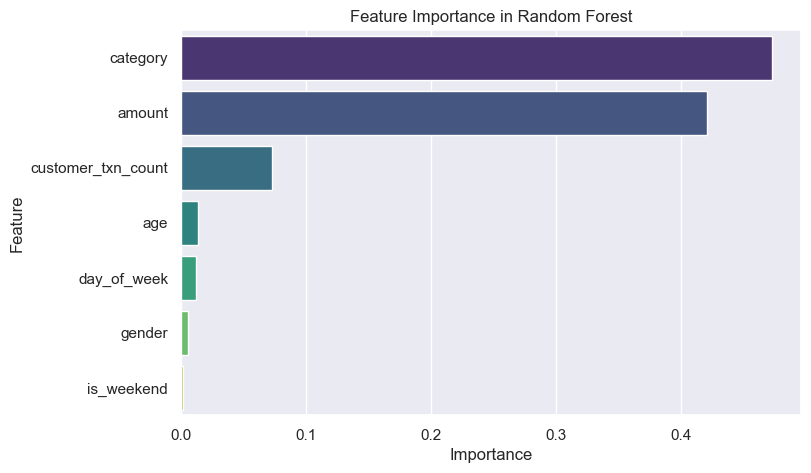

In [46]:


importances = model.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [50]:
import joblib

joblib.dump(model, "fraud_model.pkl")


['fraud_model.pkl']

In [ ]:
df.to_csv('D:/AI & data/data sets/Credit Card Fraud Detection.csv', 
                   index=False, 
                   encoding='utf-8-sig')

In [53]:
import pickle

file_name = "credit_card_fraud_model.sav"

pickle.dump(model, open(file_name, 'wb'))
